In [24]:
#pip install tensorflow
#!pip install scikit-learn


In [25]:
import pandas as pandas
import numpy as np
import matplotlib.pyplot as plt
import keras

from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 1. Data Exploration

### 1.1 Dimensionality
What is the type of the training and testing datasets?

In [26]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Training Data Shape:', x_train.shape, y_train.shape)
print('Testing Data Shape:', x_test.shape, y_test.shape)

Training Data Shape: (60000, 28, 28) (60000,)
Testing Data Shape: (10000, 28, 28) (10000,)


(a) The type and structure of the training/testing datasets

In [27]:
print('Type of x_train:', type(x_train))
print('Type of y_train:', type(y_train))
print('Type of x_test:', type(x_test))
print('Type of y_test:', type(y_test))

Type of x_train: <class 'numpy.ndarray'>
Type of y_train: <class 'numpy.ndarray'>
Type of x_test: <class 'numpy.ndarray'>
Type of y_test: <class 'numpy.ndarray'>


(b) Count the number of features (pixels) and samples

In [28]:
num_train_samples = x_train.shape[0]
num_test_samples = x_test.shape[0]

### How many features are in the training dataset? The testing dataset? How many samples are in each dataset?



In [29]:
print("x_train shape:", x_train.shape)  
print("y_train shape:", y_train.shape)  
print("x_test shape:", x_test.shape)    
print("y_test shape:", y_test.shape)    

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


Shape: (10000, 28, 28)
Number of samples: 10,000
Features: 28×28 = 784

### If an array has a shape of (100, 28, 28), what does each number represent in the context of image data (i.e., which number represents the number of images, and which represent the number of pixels?), and how would it change if you flattened it to a 2D array?

100 = number of images

28 and 28 = the height and width (in pixels) of each image

If flattened each 28×28 image into a single row, the new shape would be (100, 784), where 100 = number of images (unchanged)
784 = total number of pixels per image (28×28)



### How would you convert a 3D array into a 2D array without changing the total number of elements? Describe how flatten() and reshape() can be used for this purpose.


Converting a 3D array into a 2D array without changing the total number of elements can be done using either flatten() or reshape() in NumPy. The flatten() method collapses all dimensions of the array into a single 1D array (i.e., a long vector), maintaining the same total number of elements but losing explicit structure. By contrast, reshape() reorganizes the array into a new shape with the same total number of elements. 

Flatten() collapse all dimensions into 1D array and reshape() can ontrol the new dimensions and not changing the total number of elements.
Reshape data because many ML algorithms expect 2D array.

In [30]:
import numpy as np

# Example shape: (batch_size, height, width)
X = np.random.rand(100, 28, 28)  # shape = (100, 28, 28)
X_flat = X.flatten()  
print(X_flat.shape)  

X_2d = X.reshape(X.shape[0], -1)  # -1 lets NumPy infer the correct dimension
print(X_2d.shape)  


(78400,)
(100, 784)


### 1.2 Visualization

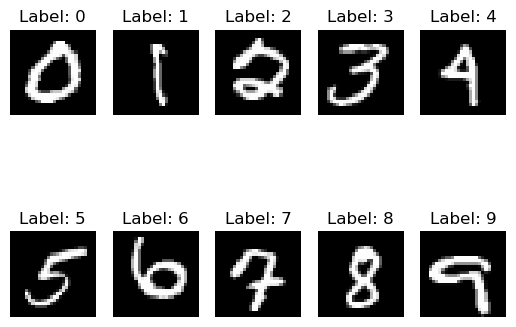

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# For each digit 0 through 9
digits = range(10)
for i, d in enumerate(digits):
    # Indices where y_test == d
    indices = np.where(y_test == d)[0]
    # Pick a random index
    rand_idx = np.random.choice(indices)
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[rand_idx], cmap='gray')
    plt.title(f"Label: {d}")
    plt.axis('off')
plt.show()


### 2. Data Processing

1. Create a 10% random subset of training and testing sets

In [32]:
import numpy as np

subset_size_train = int(0.1 * len(x_train))  # 10% of training
rand_indices_train = np.random.choice(len(x_train), subset_size_train, replace=False)
x_train_subset = x_train[rand_indices_train]
y_train_subset = y_train[rand_indices_train]

subset_size_test = int(0.1 * len(x_test))    # 10% of testing
rand_indices_test = np.random.choice(len(x_test), subset_size_test, replace=False)
x_test_subset = x_test[rand_indices_test]
y_test_subset = y_test[rand_indices_test]


2. Distribution of labels

In [33]:
unique, counts = np.unique(y_train, return_counts=True)
full_distribution = dict(zip(unique, counts))
print("Full train label distribution:", full_distribution)

unique_sub, counts_sub = np.unique(y_train_subset, return_counts=True)
sub_distribution = dict(zip(unique_sub, counts_sub))
print("Subset train label distribution:", sub_distribution)


Full train label distribution: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Subset train label distribution: {0: 615, 1: 677, 2: 584, 3: 592, 4: 572, 5: 560, 6: 596, 7: 652, 8: 553, 9: 599}


3. Subset the first 10%

In [34]:
first_10pct_train = int(0.1 * len(x_train))
x_train_first = x_train[:first_10pct_train]
y_train_first = y_train[:first_10pct_train]
# same for x_test


4. compare random selection and first portion selection
Random selection tends to preserve overall label distribution better and selecting the first 10% could be biased if the dataset is ordered or grouped by label.

5. Why subsample?
Pros: faster to experiment and train, good for prototyping.
Cons: might lose rare patterns or overall distribution coverage, risking less representative data.


### 2.2 Feature engineering

Features: pixel intensities (from x_train).

Output/labels: digit category (0 through 9) from y_train.

Importance: ML models learn mappings from input features to outputs. Mixing them up leads to data leakage or nonsense predictions.

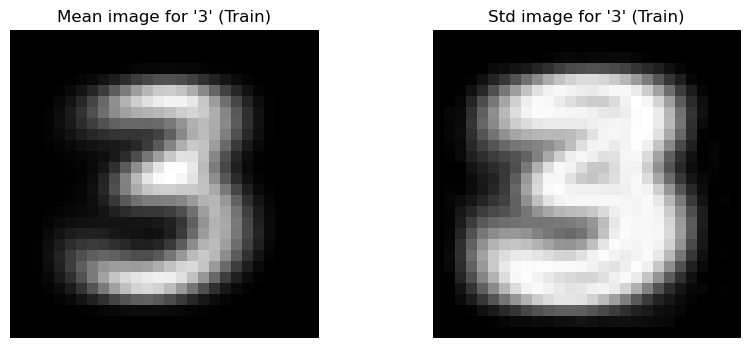

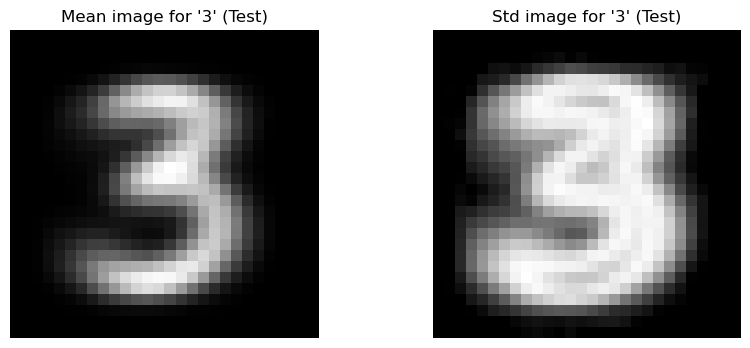

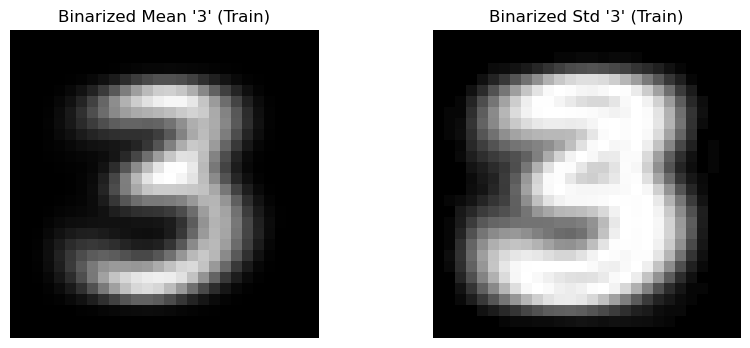

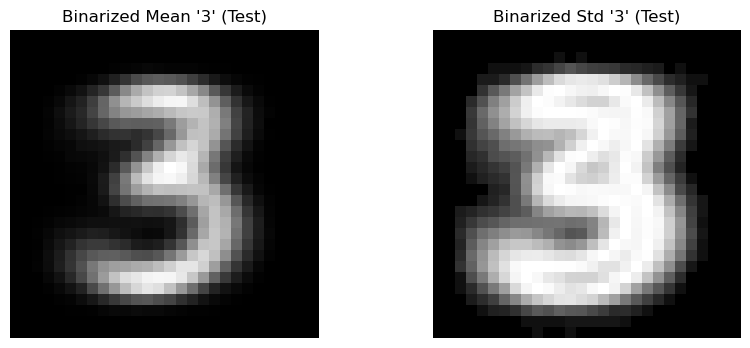

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# 1. Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Select all training images labeled "3"
x_train_3 = x_train[y_train == 3]
x_test_3 = x_test[y_test == 3]

# 3. Compute pixel-wise mean and standard deviation for the training set
mean_3_train = np.mean(x_train_3, axis=0)  # shape: (28, 28)
std_3_train = np.std(x_train_3, axis=0)    # shape: (28, 28)

# 4. Compute pixel-wise mean and standard deviation for the testing set
mean_3_test = np.mean(x_test_3, axis=0)
std_3_test = np.std(x_test_3, axis=0)

# 5. Plot the mean and standard deviation images for training set
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(mean_3_train, cmap='gray')
plt.title("Mean image for '3' (Train)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(std_3_train, cmap='gray')
plt.title("Std image for '3' (Train)")
plt.axis('off')
plt.show()

# 6. Plot the mean and standard deviation images for testing set
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(mean_3_test, cmap='gray')
plt.title("Mean image for '3' (Test)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(std_3_test, cmap='gray')
plt.title("Std image for '3' (Test)")
plt.axis('off')
plt.show()

# 7. Binarize training and testing images (threshold = 128)
x_train_3_bin = (x_train_3 > 128).astype(int)
x_test_3_bin = (x_test_3 > 128).astype(int)

mean_3_train_bin = np.mean(x_train_3_bin, axis=0)
std_3_train_bin = np.std(x_train_3_bin, axis=0)

mean_3_test_bin = np.mean(x_test_3_bin, axis=0)
std_3_test_bin = np.std(x_test_3_bin, axis=0)

# 8. Plot the binarized mean and std images (Train)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(mean_3_train_bin, cmap='gray')
plt.title("Binarized Mean '3' (Train)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(std_3_train_bin, cmap='gray')
plt.title("Binarized Std '3' (Train)")
plt.axis('off')
plt.show()

# 9. Plot the binarized mean and std images (Test)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(mean_3_test_bin, cmap='gray')
plt.title("Binarized Mean '3' (Test)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(std_3_test_bin, cmap='gray')
plt.title("Binarized Std '3' (Test)")
plt.axis('off')
plt.show()


Keeping separate training and testing datasets ensures a fair evaluation of generalization, since using the same data for training and testing may lead to overfitting and an overly optimistic accuracy. If your model performs extremely well on the training set but poorly on unseen data, it indicates that the model has likely memorized training examples instead of learning patterns that generalize.

When we binarize an image, we are converting it into a black-and-white (0s and 1s) representation based on a chosen threshold. Each pixel in the original grayscale image has a value between 0 (black) and 255 (white). When we binarize:

If a pixel's value is greater than a threshold (e.g., the mean value for that pixel across all images in a category), we set it to 1 (white).
Otherwise, we set it to 0 (black).

This transformation simplifies the image by emphasizing contrast and ignoring subtle variations in pixel intensity. The new pixel value depends on whether its original value is above or below the threshold.

### Finding the Most Dissimilar and Most Similar Image in Category "3"
To determine which training image of "3" is most similar or dissimilar to the average image:

Compute the mean image for category "3".
Calculate the distance (sum of squared differences) between each training image labeled "3" and the mean image.
The smallest distance corresponds to the most similar image.
The largest distance corresponds to the most dissimilar image.
For binarized images, the results may change because:

Binarization removes intensity information, leaving only a black-and-white pattern.
This can exaggerate or suppress differences depending on how well the patterns align with the mean binarized image.
We will plot:

The most similar and dissimilar images in the regular grayscale format.
The most similar and dissimilar images in the binarized format.


### Effect of Binarization on Machine Learning Models
Pros of binarization: Reduces complexity: Converts 256 possible pixel values into just two (0 and 1), making models simpler and faster. Removes brightness variations: Ensures that lighting differences do not affect the model's decision-making. Enhances contrast: Useful when we care about shapes and edges, not grayscale intensity.

Cons of binarization: Loss of information: Fine-grained grayscale details are removed, which might reduce accuracy. More sensitivity to noise: If the threshold is not chosen well, small variations might cause big differences in classification. Might not work well for some models: Some machine learning models perform better with grayscale data rather than binary data.

### Relation to Data Standardization
Binarization is one form of standardization, but traditional standardization (e.g., mean-centering and scaling) preserves more information.

Standardization typically transforms data so that it has zero mean and unit variance, making features comparable.
Binarization, on the other hand, completely removes intensity variations and only keeps high-contrast edges.
Why is standardization important?

Helps neural networks learn faster by ensuring inputs have a similar scale.
Prevents some features from dominating others (especially useful for gradient-based methods like logistic regression and deep learning).
Improves stability in distance-based models like k-NN and SVM.

### Pixel-wise Mean and Standard Deviation for Image Variability
The mean image gives us the "average shape" of a digit across multiple images.
The standard deviation image tells us how much variation exists at each pixel.
A high standard deviation in a certain region of the image means: 

There is significant variation in that area.
Some images have a pixel on, while others have it off (e.g., different handwriting styles).
The feature is less reliable for classification.

A low standard deviation means: 
The pixel is almost always the same across all images (e.g., the middle of the number "0").
It is a strong, consistent feature that helps in classification.



In [36]:
train_indices = np.where((y_train == 3) | (y_train == 9))[0]
test_indices = np.where((y_test == 3) | (y_test == 9))[0]

x_train_3_9 = x_train[train_indices]
y_train_3_9 = y_train[train_indices]
x_test_3_9 = x_test[test_indices]
y_test_3_9 = y_test[test_indices]

In [37]:
y_train_3_9 = np.where(y_train_3_9 == 3, 0, 1)
y_test_3_9 = np.where(y_test_3_9 == 3, 0, 1)

In [38]:
x_train_3_9_flat = x_train_3_9.reshape(x_train_3_9.shape[0], -1)
x_test_3_9_flat = x_test_3_9.reshape(x_test_3_9.shape[0], -1)

In [39]:
n_train = x_train_3_9_flat.shape[0]
cutoff = int(0.6 * n_train)

x_train_set1, y_train_set1 = x_train_3_9_flat[:cutoff], y_train_3_9[:cutoff]
x_train_set2, y_train_set2 = x_train_3_9_flat[cutoff:], y_train_3_9[cutoff:]

In [40]:
svm_model = SVC(kernel='linear')
svm_model.fit(x_train_set1, y_train_set1)


SVC(kernel='linear')

In [41]:
y_pred_set2 = svm_model.predict(x_train_set2)
y_pred_test = svm_model.predict(x_test_3_9_flat)
print(f"SVM accuracy on Set2: {acc_set2:.4f}")
print(f"SVM accuracy on Test set: {acc_test:.4f}")


SVM accuracy on Set2: 0.9733
SVM accuracy on Test set: 0.9737


K-nearest neighbourhood

In [44]:
# 1) Make sure imports are at the top
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 2) Data loading
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 3) Filtering or reshaping, e.g.
selected_labels = [1, 3, 5, 7, 9]
train_indices = np.isin(y_train, selected_labels)
test_indices = np.isin(y_test, selected_labels)

x_train_sel = x_train[train_indices]
y_train_sel = y_train[train_indices]
x_test_sel = x_test[test_indices]
y_test_sel = y_test[test_indices]

x_train_sel_flat = x_train_sel.reshape(x_train_sel.shape[0], -1)
x_test_sel_flat = x_test_sel.reshape(x_test_sel.shape[0], -1)

# 4) Training & evaluating multiple k values
k_values = [4, 8, 12, 16, 20, 24, 28, 32, 36, 40]
accuracies = {}
conf_mats = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_sel_flat, y_train_sel)
    y_pred = knn.predict(x_test_sel_flat)

    acc = accuracy_score(y_test_sel, y_pred)
    accuracies[k] = acc

    cm = confusion_matrix(y_test_sel, y_pred, labels=selected_labels)
    conf_mats[k] = cm

    print(f"k={k} --> Test Accuracy = {acc:.4f}")


k=4 --> Test Accuracy = 0.9767
k=8 --> Test Accuracy = 0.9771
k=12 --> Test Accuracy = 0.9767
k=16 --> Test Accuracy = 0.9762
k=20 --> Test Accuracy = 0.9754
k=24 --> Test Accuracy = 0.9740
k=28 --> Test Accuracy = 0.9732
k=32 --> Test Accuracy = 0.9728
k=36 --> Test Accuracy = 0.9710
k=40 --> Test Accuracy = 0.9708


### Why is it important to have separate training and testing datasets?
Using a separate training set and testing set is crucial to ensure that the model’s performance is evaluated on data it has not seen before. Some key points are:

Detect Overfitting: If we train and evaluate on the same dataset, the model might simply memorize the training examples, resulting in an overly optimistic accuracy.
Generalization: We want to know how well the model performs on unseen data in real scenarios. A separate test set gives an unbiased estimate of real-world performance.
Model Selection: If all data is used for training, we lose the ability to fairly compare different model architectures, hyperparameters, or algorithms because we won’t have a fair baseline to see which truly performs better.
If the same data is used both for training and evaluation, the primary issues are:

Overly Optimistic Metrics: The accuracy, precision, or recall you measure might look artificially high, because the model was tested on examples it already “knows.”
Poor Real-World Performance: When actually deployed, the model might not perform nearly as well as your metrics suggest, because it has only memorized specific examples rather than learned general patterns.
### High Accuracy on Training Set but Lower Accuracy on Testing Set
If your model achieves a high accuracy on the training set but performs poorly on a separate testing set, it is a strong indicator of overfitting. Overfitting occurs when the model:

Learns Noise or Specifics: The model fits very closely to the peculiarities of the training data, including noise or idiosyncratic details, rather than learning the broader, underlying structure.
Fails to Generalize: As a result, when faced with new, unseen data, the model’s performance degrades significantly.
In essence, overfitting is the scenario in which the model memorizes the training examples rather than discovering generalizable patterns. This is why the test set accuracy becomes a more honest gauge of a model’s ability to perform on new data.